# Question 2

In [53]:
# imports
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import quad

In [54]:
# loading in the data
sat = np.genfromtxt("SAT.csv")
lunch = np.genfromtxt("lunch_wait_time.csv")
student_age = np.genfromtxt("student_age.csv")

data = [sat, lunch, student_age]

In [55]:
# Getting the size of the data, the mean, and the standard deviation
def get_stats(samples):
    n = len(samples)
    mean = np.mean(samples)
    std = np.std(samples)
    return n, mean, std

sat_n, sat_mean, sat_std = get_stats(sat)
lunch_n, lunch_mean, lunch_std = get_stats(lunch)
age_n, age_mean, age_std = get_stats(student_age)

Text(0.5, 1.0, 'SAT Score histogram')

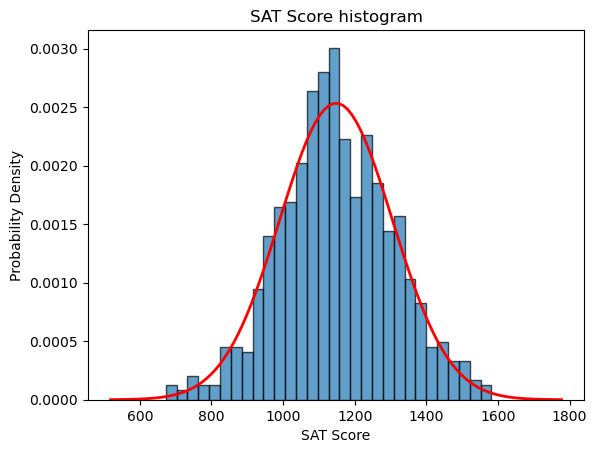

In [56]:
# plotting for sat
plt.hist(sat, bins=30, density=True, alpha=0.7, edgecolor="black")

# Gaussian distribution fits the best
x = np.linspace(sat_mean - 4*sat_std, sat_mean + 4*sat_std, 100)
y = (1 / (sat_std * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - sat_mean) / sat_std) ** 2)
plt.plot(x, y, color='red', linewidth=2)

plt.xlabel("SAT Score")
plt.ylabel("Probability Density")
plt.title("SAT Score histogram")

Text(0.5, 1.0, 'Lunch wait time histogram')

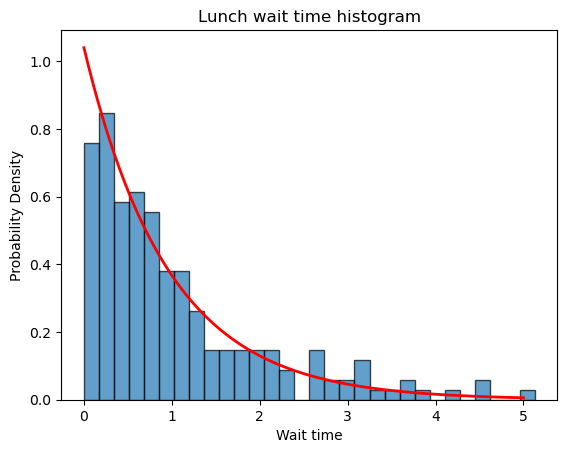

In [57]:
# plotting for lunch wait times
plt.hist(lunch, bins=30, density=True, alpha=0.7, edgecolor="black")

# fits the exponential model best
x = np.linspace(0, 5, 100)
y = lunch_mean * np.exp(-lunch_mean * x)
plt.plot(x, y, color='red', linewidth=2)

plt.xlabel("Wait time")
plt.ylabel("Probability Density")
plt.title("Lunch wait time histogram")

Text(0.5, 1.0, 'Student age histogram')

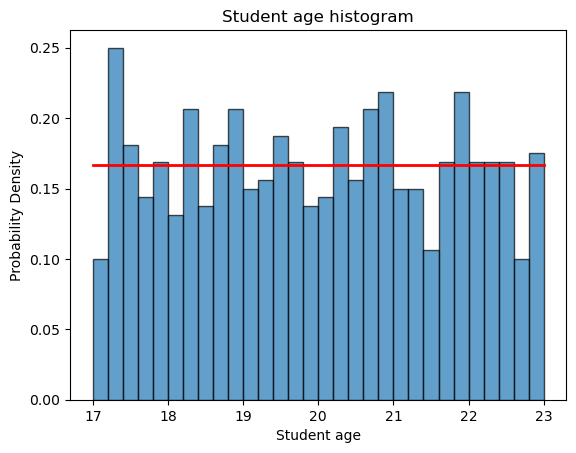

In [58]:
# plotting for student ages
plt.hist(student_age, bins=30, density=True, alpha=0.7, edgecolor="black")

# uniform distribution fits the best
x = np.linspace(17, 23, 100)
y = [1/6 for _ in range(len(x))]
plt.plot(x, y, color='red', linewidth=2)

plt.xlabel("Student age")
plt.ylabel("Probability Density")
plt.title("Student age histogram")

In [59]:
# getting all the people who scored above 1200
above_1200 = [score for score in sat if score > 1200]
true_prob_sat = len(above_1200)/sat_n

# getting the probability of people who scored above 1200
print(f'Probability of students scoring over 1200: {true_prob_sat}')

Probability of students scoring over 1200: 0.3575


In [60]:
# using integration
def integrand(x):
    return (1 / (sat_std * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - sat_mean) / sat_std) ** 2)

result_sat, _ = quad(integrand, 1200, 1600)
print(f'Probability: {result_sat}')

Probability: 0.36812587304355354


In [61]:
# get the difference between the actual probability from the data and the predicted using quad
print(f'Difference in probabilities: {abs(true_prob_sat - result_sat)}')

Difference in probabilities: 0.010625873043553558


The actual probability was 0.3575, and the predicted from integration is 0.3681, the difference is 0.0106, or about 1%, which is small

In [62]:
# getting all people who had to wait above 5 minutes
morethan5 = [wait_time for wait_time in lunch if wait_time > 5]
true_prob_lunch = len(morethan5)/lunch_n

# probability of people who waited more than 5 minutes
print(f'Probability of people who waited more than 5 minutes: {true_prob_lunch}')

Probability of people who waited more than 5 minutes: 0.005


In [63]:
def integrand(x):
    return lunch_mean * np.exp(-lunch_mean * x)

# technically should be integrating to infinity, but at 30 should be close enough
result_lunch, _ = quad(integrand, 5, 30)
print(f'Probability: {result_lunch}')

Probability: 0.0055027902345878435


In [64]:
# get the difference between the actual probability from the data and the predicted using quad
print(f'Difference in probabilities: {abs(true_prob_lunch - result_lunch)}')

Difference in probabilities: 0.0005027902345878434


The actual probability was 0.005, and the predicted from integration is 0.0055, the difference is 0.0005, which is very small

# Question 3

In [65]:
# the integrand is x**2 - x + 1
# so the integral function will be (x**3/3) - (x**2/2) + x
# right now we have: (x**3/3) - (x**2/2) + x = 1
# to solve for roots we need to set equal to 0
# --> (x**3/3) - (x**2/2) + x - 1 = 0
roots = np.roots([1/3, -1/2, 1, -1])
print(f'Real solutions: {[float(root) for root in roots if np.isreal(root)]}')

# the only real solution is 1.1537 + 0j, or 1.1537
# So, b = 1.1537

Real solutions: [1.1536528590388515]


/var/folders/p9/jkcmq1t54bgdqdz9m02r95g00000gn/T/ipykernel_39665/643150277.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  print(f'Real solutions: {[float(root) for root in roots if np.isreal(root)]}')
